In [37]:
from sqlalchemy import create_engine, Column, MetaData, literal

from clickhouse_sqlalchemy import Table, make_session, get_declarative_base, types, engines

uri = 'clickhouse://default:@localhost/pae'
# uri = 'clickhouse+native://default:@localhost/test'

engine = create_engine(uri)
session = make_session(engine)
metadata = MetaData(bind=engine)

Base = get_declarative_base(metadata=metadata)

class Depth(Base):
    timestamp = Column(types.DateTime64, primary_key=True)
    date = Column(types.Date)
    triggerTimestamp = Column(types.DateTime64)
    ecnTimestamp = Column(types.DateTime64)
    ecn = Column(types.String)
    ccyPair = Column(types.String)
    tenor = Column(types.String)
    bid = Column(types.Array(types.Float64))
    ask = Column(types.Array(types.Float64))
    levels = Column(types.Array(types.Int32))

    __table_args__ = (
        engines.Memory(),
    )

table = Depth.__table__

In [54]:
import pandas as pd


query = """
select timestamp as ts, date, ecn, ccyPair, tenor, bid[1] as bid, ask, levels from depth limit 1000
"""

df = pd.read_sql(query, engine)

print(type(df.bid))


<class 'pandas.core.series.Series'>


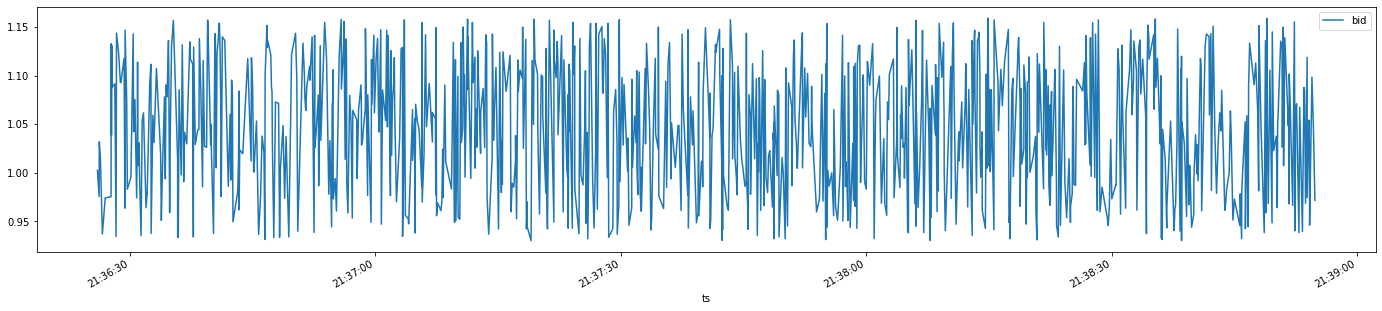

In [55]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (24,5)


df.plot(x ='ts', y='bid', kind = 'line')
plt.show()